In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


In [3]:
print(tf.__version__)


2.5.0


In [15]:
data_dir = '../../assets/model_training'
os.listdir(data_dir)

['not_pizza', 'pizza']

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
import os
def replace(folder_path, old, new):
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if(old.lower() in name.lower()):
                file_path = os.path.join(path,name)
                new_name = os.path.join(path,name.lower().replace(old,new))
                os.rename(file_path, new_name)

In [12]:
# replace('../../assets/images/fruit','.','f.')

In [13]:
# replace('../../assets/images/man','.','m.')
# replace('../../assets/images/woman','.','w.')
# replace('../../assets/images/people','.','ppl.')
# replace('../../assets/images/car','.','c.')
# replace('../../assets/images/vegetable','.','v.')
# replace('../../assets/images/animal','.','an.')
# replace('../../assets/images/airplane','.','ap.')
# replace('../../assets/images/pizza','.','p1.')
# replace('../../assets/images/cheese\ pizza','.','p2.')
# replace('../../assets/images/mushroom\ pizza','.','p3.')
# replace('../../assets/images/pepperoni\ pizza','.','p4.')











In [14]:
batch_size = 200
img_height = 180
img_width = 180

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 10867 files belonging to 2 classes.
Using 8694 files for training.
Found 10867 files belonging to 2 classes.
Using 2173 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['not_pizza', 'pizza']


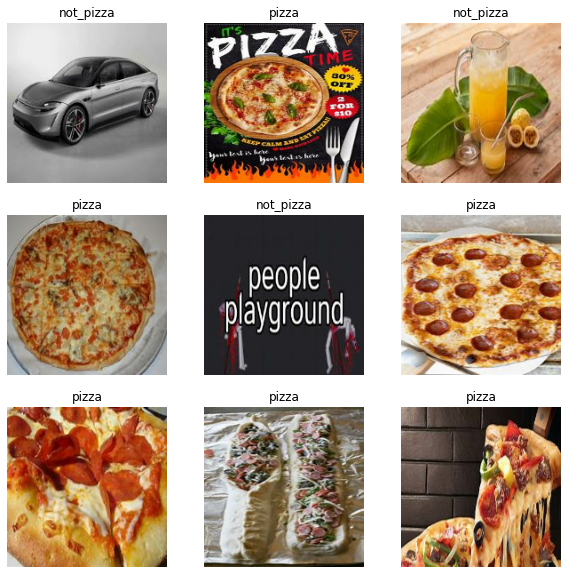

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [22]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [23]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
44/44 [==============================] - 16s 173ms/step - loss: 0.5538 - accuracy: 0.7248 - val_loss: 0.3484 - val_accuracy: 0.8546
Epoch 2/50
44/44 [==============================] - 4s 91ms/step - loss: 0.3138 - accuracy: 0.8697 - val_loss: 0.2908 - val_accuracy: 0.8803
Epoch 3/50
44/44 [==============================] - 4s 91ms/step - loss: 0.2782 - accuracy: 0.8900 - val_loss: 0.2470 - val_accuracy: 0.9103
Epoch 4/50
44/44 [==============================] - 4s 91ms/step - loss: 0.2480 - accuracy: 0.9012 - val_loss: 0.2413 - val_accuracy: 0.9084
Epoch 5/50
44/44 [==============================] - 4s 89ms/step - loss: 0.2126 - accuracy: 0.9156 - val_loss: 0.2187 - val_accuracy: 0.9172
Epoch 6/50
44/44 [==============================] - 4s 90ms/step - loss: 0.1853 - accuracy: 0.9274 - val_loss: 0.1997 - val_accuracy: 0.9254
Epoch 7/50
44/44 [==============================] - 4s 90ms/step - loss: 0.1558 - accuracy: 0.9404 - val_loss: 0.1957 - val_accuracy: 0.9310
Epoch 8/50


In [32]:
human = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/Mzc5Njk1Ng.jpeg', target_size=(180, 180))
human = np.asarray(human).reshape(-1, 180, 180, 3)
print(model.predict_classes(human)[0])
pred = model.predict(human)


0
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
pred.argmax(axis=-1)

array([0], dtype=int64)

In [38]:
pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/ismymodelanygood.jpg', target_size=(180, 180))
pizza = np.asarray(pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(pizza)[0])
pred_pizza = model.predict(pizza)


1
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
model.save('./assets/model1.h5')

In [44]:
green_ball = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/green_ball.jpg', target_size=(180, 180))
green_ball = np.asarray(green_ball).reshape(-1, 180, 180, 3)
print(model.predict_classes(green_ball)[0])
pred_pizza = model.predict(green_ball)

0


In [42]:
green_ball = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/RedBallpng.png', target_size=(180, 180))
green_ball = np.asarray(green_ball).reshape(-1, 180, 180, 3)
print(model.predict_classes(green_ball)[0])
pred_pizza = model.predict(green_ball)

0
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [43]:
green_ball = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/green-salad.jpg', target_size=(180, 180))
green_ball = np.asarray(green_ball).reshape(-1, 180, 180, 3)
print(model.predict_classes(green_ball)[0])
pred_pizza = model.predict(green_ball)

0


In [45]:
green_ball = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/Star-Pizza-Facebook.jpg', target_size=(180, 180))
green_ball = np.asarray(green_ball).reshape(-1, 180, 180, 3)
print(model.predict_classes(green_ball)[0])
pred_pizza = model.predict(green_ball)

1
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
